In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Shotlog=pd.read_csv("C:/Users/trent/OneDrive/Documents/Repositories/NBA-HotHand-Analysis/data/Shotlog2.csv")
Player_Stats=pd.read_csv("C:/Users/trent/OneDrive/Documents/Repositories/NBA-HotHand-Analysis/data/Player_Stats2.csv")
Player_Shots=pd.read_csv("C:/Users/trent/OneDrive/Documents/Repositories/NBA-HotHand-Analysis/data/Player_Shots2.csv")
Shotlog.head()

,team_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,...,shoot_player,time_from_last_shot,quarter,current_shot_outcome,current_shot_hit,lag_shot_hit,average_hit,shot_count,shot_per_game,conse_shot_hit
0,MISSED,PG,Yes,210.0,SCORED,ATL,Pullup Jump Shot,2,WAS,267.0,...,Dennis Schroder,27.0,1,MISSED,0,1.0,0.451029,1215,12,0
1,MISSED,SF,Yes,279.0,SCORED,ATL,Jump Shot,3,WAS,130.0,...,Kent Bazemore,4.0,1,MISSED,0,0.0,0.408587,722,7,0
2,MISSED,PG,Yes,58.0,SCORED,ATL,Driving Layup,2,WAS,262.0,...,Dennis Schroder,50.0,1,MISSED,0,0.0,0.451029,1215,12,0
3,MISSED,C,Yes,107.0,SCORED,ATL,Turnaround Jump Shot,2,WAS,254.0,...,Dwight Howard,3.0,1,MISSED,0,1.0,0.631922,614,9,0
4,MISSED,PF,Yes,167.0,MISSED,ATL,Pullup Jump Shot,2,WAS,306.0,...,Paul Millsap,47.0,1,SCORED,1,0.0,0.442387,972,20,0


Prediction Error

In [3]:
Shotlog['error']=Shotlog['current_shot_hit']-Shotlog['average_hit']
Shotlog['lagerror']=Shotlog['lag_shot_hit']-Shotlog['average_hit']

In [4]:
Shotlog['time'] = pd.to_timedelta(Shotlog['time'])
Shotlog['time'].describe()

count                       185052
mean     0 days 00:06:20.229465231
std      0 days 00:03:23.013120552
min                0 days 00:00:00
25%                0 days 00:03:30
50%                0 days 00:06:19
75%                0 days 00:09:14
max                0 days 00:12:00
Name: time, dtype: object

<Axes: xlabel='time'>

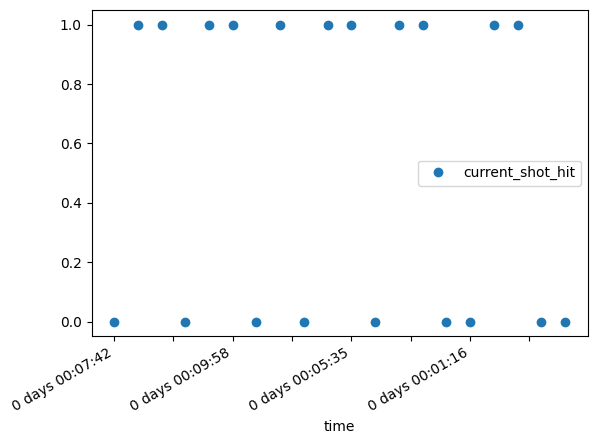

In [5]:
# Example plot of LeBron James shots on 2017-04-09
Shotlog[(Shotlog.shoot_player == 'LeBron James')&(Shotlog.date=='2017-04-09')].plot(x='time', y='current_shot_hit', marker='o', linewidth=0)

In [6]:
# dataframe of just LeBron James shots
LeBron_James=Shotlog[(Shotlog.shoot_player == 'LeBron James')]
LeBron_James.head()

,team_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,...,quarter,current_shot_outcome,current_shot_hit,lag_shot_hit,average_hit,shot_count,shot_per_game,conse_shot_hit,error,lagerror
30762,MISSED,SF,Yes,236.0,MISSED,CLE,Jump Shot,3,NYK,84.0,...,1,MISSED,0,1.0,0.547619,1344,14,0,-0.547619,0.452381
30763,BLOCKED,SF,Yes,264.0,SCORED,CLE,Jump Shot,3,NYK,383.0,...,1,MISSED,0,0.0,0.547619,1344,14,0,-0.547619,-0.547619
30770,SCORED,SF,Yes,50.0,MISSED,CLE,Running Layup,2,NYK,259.0,...,1,SCORED,1,0.0,0.547619,1344,14,0,0.452381,-0.547619
30776,MISSED,SF,Yes,52.0,SCORED,CLE,Putback Dunk,2,NYK,250.0,...,1,SCORED,1,1.0,0.547619,1344,14,1,0.452381,0.452381
30784,MISSED,SF,Yes,52.0,MISSED,CLE,Dunk,2,NYK,250.0,...,2,SCORED,1,1.0,0.547619,1344,14,1,0.452381,0.452381


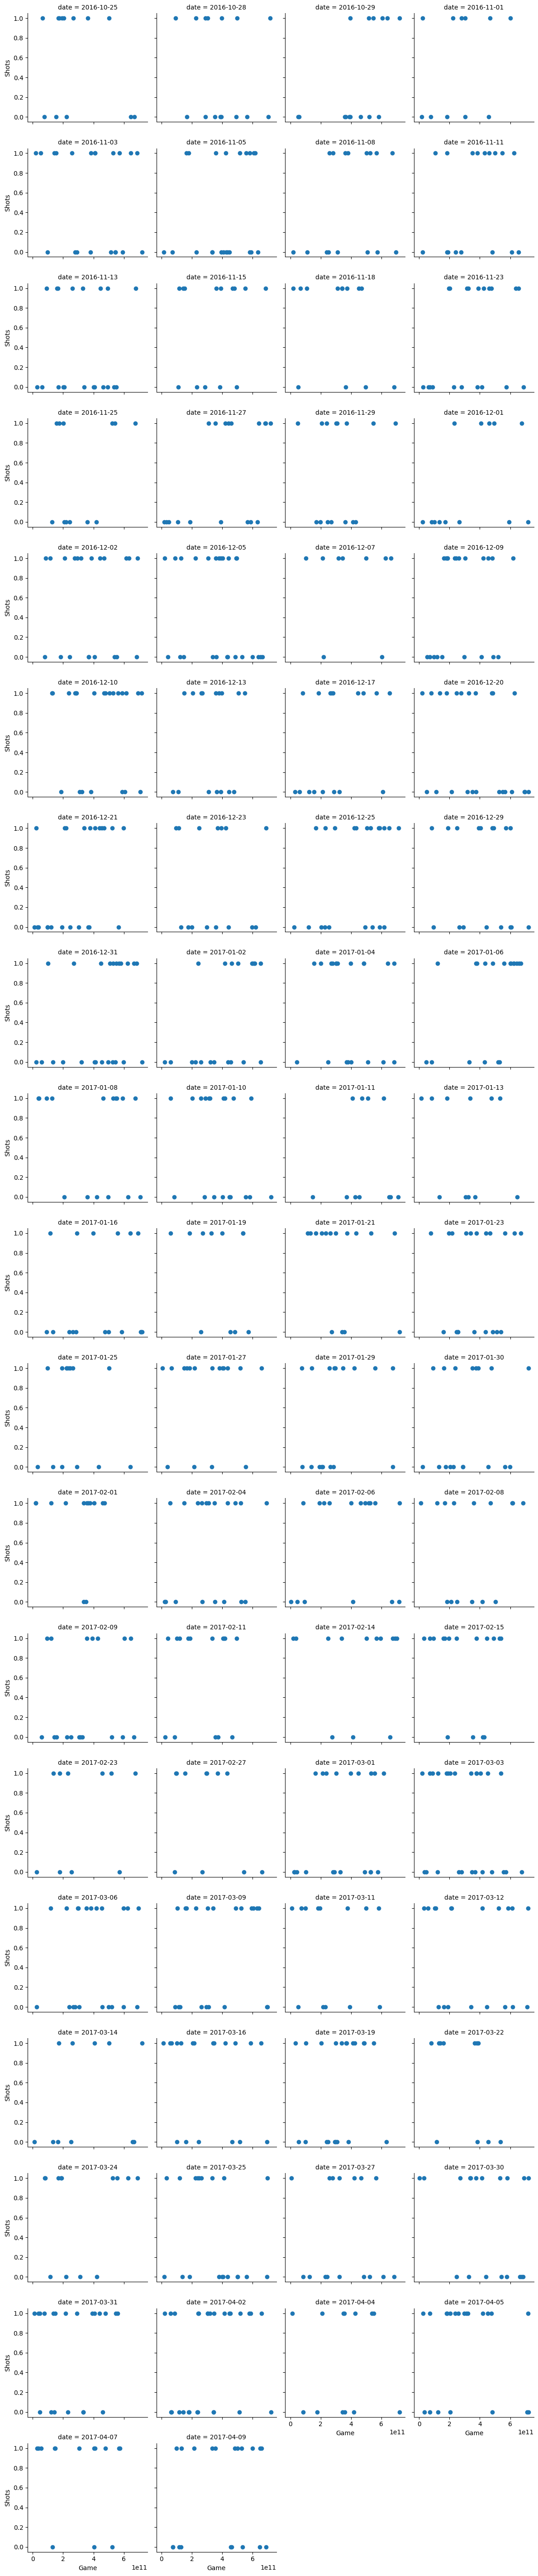

In [7]:
g = sns.FacetGrid(LeBron_James, col="date", col_wrap=4)
g = g.map(plt.plot, "time", "current_shot_hit", marker='o', linewidth=0)
g.set_axis_labels("Game", "Shots");

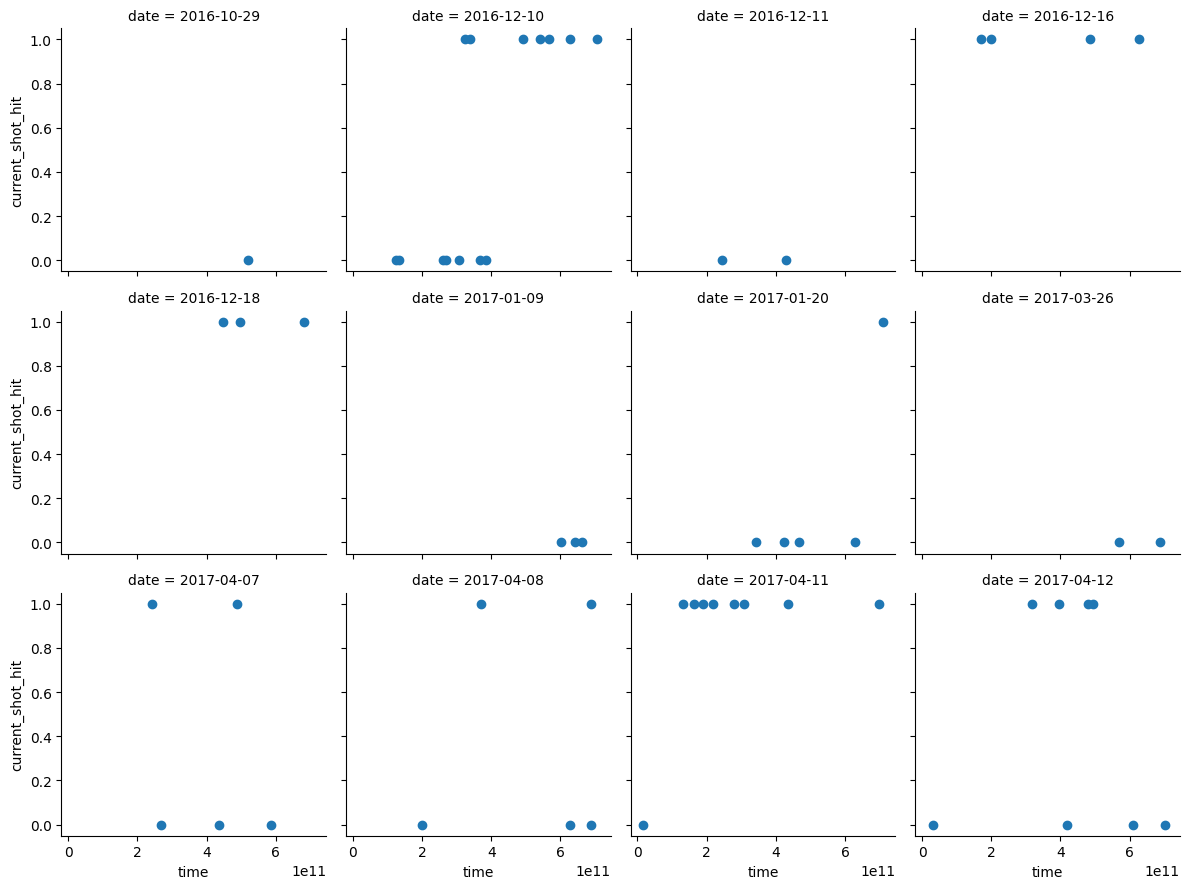

In [8]:
# dataframe of just Cheick Diallo shots and plot
Cheick_Diallo=Shotlog[(Shotlog.shoot_player == 'Cheick Diallo')]
g = sns.FacetGrid(Cheick_Diallo, col="date", col_wrap=4)
g = g.map(plt.plot, "time", "current_shot_hit", marker='o', linewidth=0)

Regression Analysis on Prediction Error

In [9]:
# regression of prediction error of current period on the prediction error of the previous period
reg1 = sm.ols(formula = 'error ~ lagerror', data= Shotlog).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  error   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     71.65
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           2.58e-17
Time:                        09:01:24   Log-Likelihood:            -1.3244e+05
No. Observations:              185052   AIC:                         2.649e+05
Df Residuals:                  185050   BIC:                         2.649e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0018      0.001      1.589      0.1

In [10]:
# regression of prediction error of current period on the prediction error of the previous period and other controls
reg2 = sm.ols(formula = 'error ~ lagerror+player_position+home_game+opponent_previous_shot+C(points)+time_from_last_shot+C(quarter)', data= Shotlog).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  error   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     139.9
Date:                Sat, 30 Aug 2025   Prob (F-statistic):               0.00
Time:                        09:02:59   Log-Likelihood:            -1.2632e+05
No. Observations:              178281   AIC:                         2.527e+05
Df Residuals:                  178261   BIC:                         2.529e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Weighted Least Squares Regression

In [11]:
# Weighted Least Squares Regression by the number of shots the player takes per game
reg3 = sm.wls(formula = 'error ~ lagerror+player_position+home_game+opponent_previous_shot+points+time_from_last_shot+quarter',  weights=1/Shotlog['shot_per_game'] , data= Shotlog).fit()
print(reg3.summary())

                            WLS Regression Results                            
Dep. Variable:                  error   R-squared:                       0.015
Model:                            WLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     209.7
Date:                Sat, 30 Aug 2025   Prob (F-statistic):               0.00
Time:                        09:04:43   Log-Likelihood:            -1.3913e+05
No. Observations:              178281   AIC:                         2.783e+05
Df Residuals:                  178267   BIC:                         2.784e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Regression analysis on individual players

In [12]:
# Regression analysis on Lebron James
reg_LeBron = sm.ols(formula = 'error ~ lagerror+home_game+opponent_previous_shot+C(points)+time_from_last_shot+C(quarter)', data= LeBron_James).fit()
print(reg_LeBron.summary())

                            OLS Regression Results                            
Dep. Variable:                  error   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     6.937
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           1.89e-11
Time:                        09:06:11   Log-Likelihood:                -827.33
No. Observations:                1204   AIC:                             1679.
Df Residuals:                    1192   BIC:                             1740.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [13]:
# Weighted Least Squares Regression on Lebron James
reg_LeBron_wls = sm.wls(formula = 'error ~ lagerror+home_game+opponent_previous_shot+points+time_from_last_shot+quarter',  weights=1/LeBron_James['shot_per_game'] , data= LeBron_James).fit()
print(reg_LeBron_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                  error   R-squared:                       0.066
Model:                            WLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     12.15
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           4.63e-15
Time:                        09:06:42   Log-Likelihood:                -837.48
No. Observations:                1204   AIC:                             1691.
Df Residuals:                    1196   BIC:                             1732.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [14]:
# Autocorrelation coefficient of LeBron James shots
Shotlog[(Shotlog.shoot_player == 'LeBron James')][['current_shot_hit','lag_shot_hit']].corr()

,current_shot_hit,lag_shot_hit
current_shot_hit,1.000000,-0.033244
lag_shot_hit,-0.033244,1.000000


In [17]:
# Function to run regression for any player
def reg_player(player):
    Shotlog_player=Shotlog[Shotlog.shoot_player==player]
    reg_player=sm.ols(formula = 'error ~ lagerror+home_game+opponent_previous_shot+points+time_from_last_shot+quarter', data= Shotlog_player).fit()
    print(reg_player.summary())
    return; 

In [18]:
reg_player('Russell Westbrook')

                            OLS Regression Results                            
Dep. Variable:                  error   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.740
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           0.000498
Time:                        09:10:02   Log-Likelihood:                -1290.1
No. Observations:                1828   AIC:                             2596.
Df Residuals:                    1820   BIC:                             2640.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [19]:
# Function to run weighted least squares regression for any player
def reg_wls_player(player):
    Shotlog_player=Shotlog[Shotlog.shoot_player==player]
    reg_wls_player=sm.wls(formula = 'error ~ lagerror+home_game+opponent_previous_shot+points+time_from_last_shot+quarter',weights=1/Shotlog_player['shot_per_game'] , data= Shotlog_player).fit()
    print(reg_wls_player.summary())
    return; 

In [20]:
reg_wls_player('Russell Westbrook')

                            WLS Regression Results                            
Dep. Variable:                  error   R-squared:                       0.014
Model:                            WLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.656
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           0.000632
Time:                        09:10:33   Log-Likelihood:                -1325.2
No. Observations:                1828   AIC:                             2666.
Df Residuals:                    1820   BIC:                             2711.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Estimated Coefficient on the lagged error for each player

In [21]:
player_list = np.array(Shotlog['shoot_player'])
player_list = np.unique(player_list)

In [22]:
player_list[0]

'A.J. Hammons'

In [23]:
# Running regression on first player in the list
Shotlog_player=Shotlog[Shotlog.shoot_player==player_list[0]]
reg_player=sm.wls(formula = 'error ~ lagerror+home_game+opponent_previous_shot+points+time_from_last_shot+quarter', weights=1/Shotlog_player['shot_per_game'], data= Shotlog_player).fit()
print(reg_player.summary())

                            WLS Regression Results                            
Dep. Variable:                  error   R-squared:                       0.410
Model:                            WLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     2.317
Date:                Sat, 30 Aug 2025   Prob (F-statistic):             0.0732
Time:                        09:12:09   Log-Likelihood:                -12.596
No. Observations:                  27   AIC:                             39.19
Df Residuals:                      20   BIC:                             48.26
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [ ]:
# Collecting regression output into a dataframe (coefficients, t-values, p-values)
RegParams = pd.DataFrame(reg_player.params).reset_index()
RegTvals = pd.DataFrame(reg_player.tvalues).reset_index()
RegPvals = pd.DataFrame(reg_player.pvalues).reset_index()

RegOutput = pd.merge(RegParams, RegTvals, on=['index'])
RegOutput = pd.merge(RegOutput, RegPvals, on=['index'])
RegOutput

,index,0_x,0_y,0
0,Intercept,0.274644,0.356938,0.724877
1,home_game[T.Yes],-0.302603,-1.475049,0.155769
2,opponent_previous_shot[T.SCORED],-0.570258,-2.292908,0.032826
3,lagerror,0.090024,0.432869,0.669742
4,points,-0.152748,-0.629826,0.535938
5,time_from_last_shot,-0.003295,-0.446319,0.660162
6,quarter,0.164321,1.538863,0.139510


In [29]:
# Extracting coefficient, t-statistic, and p-value for each player
i = 0 
Player_Results = {}
while i <= len(player_list) - 1:
    Shotlog_player=Shotlog[Shotlog.shoot_player==player_list[i]]
    reg_player=sm.wls(formula = 'error ~ lagerror+home_game+opponent_previous_shot+points+time_from_last_shot+quarter', weights=1/Shotlog_player['shot_per_game'], data= Shotlog_player).fit()
    RegParams = pd.DataFrame(reg_player.params).reset_index()
    RegTvals = pd.DataFrame(reg_player.tvalues).reset_index()
    RegPvals = pd.DataFrame(reg_player.pvalues).reset_index()

    RegOutput = pd.merge(RegParams, RegTvals, on=['index'])
    RegOutput = pd.merge(RegOutput, RegPvals, on=['index'])
    RegOutput
    
    LagErr = RegOutput[RegOutput['index'] == 'lagerror']
    LagErr = LagErr.drop(columns=['index'])
    LagErr = LagErr.rename(columns={"0_x":"Coef", "0_y":"T_Statistics", 0:"P_Value"})
    LagErr['shoot_player'] = player_list[i]
    Headers = ['shoot_player', 'Coef', 'T_Statistics', 'P_Value']
    Player_Results[i] = LagErr[Headers]
    i = i+1

In [33]:
# Dataframe of results for all players
RegPlayer = Player_Results[0]
j = 1
while j <= len(player_list) - 1:
    RegPlayer = pd.concat([RegPlayer, Player_Results[j]])
    j = j + 1

RegPlayer = RegPlayer.reset_index(drop=True)

In [34]:
# Merging in player statistics and number of shots taken
RegPlayer=pd.merge(RegPlayer, Player_Shots, on=['shoot_player'])
RegPlayer.head()

,shoot_player,Coef,T_Statistics,P_Value,shot_count,avg_shot_game
0,A.J. Hammons,0.090024,0.432869,0.669742,42,2.800000
1,Aaron Brooks,-0.038379,-0.577078,0.564466,300,4.838710
2,Aaron Gordon,-0.003899,-0.110137,0.912330,864,10.800000
3,Adreian Payne,-0.323775,-2.017711,0.052349,54,3.600000
4,Al Horford,-0.031727,-0.851036,0.395038,801,11.779412


In [35]:
# Players with statistically significant coefficients on lagged error term
display(RegPlayer.loc[RegPlayer['P_Value']<=0.05])

,shoot_player,Coef,T_Statistics,P_Value,shot_count,avg_shot_game
5,Al Jefferson,-0.138732,-2.671595e+00,7.888310e-03,471,7.246154
27,Anthony Davis,-0.069182,-2.629957e+00,8.632447e-03,1525,20.333333
28,Anthony Morrow,-0.148779,-2.181863e+00,3.033403e-02,251,5.340426
46,Boris Diaw,0.158741,2.530215e+00,1.204544e-02,327,4.671429
103,DeAndre Liggins,-0.257574,-2.468259e+00,1.558089e-02,142,3.021277
137,Elijah Millsap,-0.037456,-8.968896e+12,7.098084e-14,7,3.500000
146,Frank Kaminsky,0.086975,2.306844e+00,2.136766e-02,802,10.693333
174,Isaiah Thomas,-0.073223,-2.697235e+00,7.078367e-03,1473,19.381579
197,Jared Dudley,-0.205050,-3.462836e+00,6.241124e-04,346,5.580645
204,Jason Terry,-0.183497,-2.442365e+00,1.573796e-02,243,3.375000


In [36]:
Shotlog.to_csv("C:/Users/trent/OneDrive/Documents/Repositories/NBA-HotHand-Analysis/data/Shotlog3.csv")
Player_Stats.to_csv("C:/Users/trent/OneDrive/Documents/Repositories/NBA-HotHand-Analysis/data/Player_Stats3.csv", index=False)
Player_Shots.to_csv("C:/Users/trent/OneDrive/Documents/Repositories/NBA-HotHand-Analysis/data/Player_Shots3.csv", index=False)